In [286]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
from pandas import DataFrame, Series
from math import isnan
import matplotlib.pyplot as plt
import matplotlib
import datetime
# Numpy options
np.random.seed(78)
# Pandas options
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 400)
# Matplotlib options
matplotlib.rcParams['image.cmap'] = 'viridis'
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (20,10)
%matplotlib inline

In [236]:
# df = pd.read_csv('data/taxi_injury_counts.txt',usecols=lambda x: x.upper() in ['COL1', 'COL3'])
data = pd.read_table('data/taxi_injury_time.txt',sep='\)\),', engine='python', header = None)

In [237]:
data = data.transpose()

In [238]:
data

,0
0,"(('40.650', '-73.964'), (84, 2"
1,"(('40.718', '-73.963'), (1674, 4"
2,"(('40.712', '-73.965'), (817, 2"
3,"(('40.696', '-73.922'), (19, 3"
4,"(('40.633', '-73.952'), (40, 3"
5,"(('40.733', '-73.991'), (34260, 3"
6,"(('40.717', '-73.993'), (1444, 2"
7,"(('40.756', '-73.972'), (73985, 2"
8,"(('40.790', '-73.945'), (4843, 4"
9,"(('40.694', '-73.955'), (458, 1"


In [178]:
data = data.iloc[1::2, :]

In [239]:
data = data.reset_index(drop=True)

In [240]:
data = data.rename(columns={0: 'AB'})

In [241]:
data['coordinate'], data['counts'] = data['AB'].str.split('\),', 1).str

In [247]:
data

,AB,coordinate,counts,taxi_counts,injuries
0,"(('40.650', '-73.964'), (84, 2","'40.650', '-73.964'","84, 2",84,2
1,"(('40.718', '-73.963'), (1674, 4","'40.718', '-73.963'","1674, 4",1674,4
2,"(('40.712', '-73.965'), (817, 2","'40.712', '-73.965'","817, 2",817,2
3,"(('40.696', '-73.922'), (19, 3","'40.696', '-73.922'","19, 3",19,3
4,"(('40.633', '-73.952'), (40, 3","'40.633', '-73.952'","40, 3",40,3
5,"(('40.733', '-73.991'), (34260, 3","'40.733', '-73.991'","34260, 3",34260,3
6,"(('40.717', '-73.993'), (1444, 2","'40.717', '-73.993'","1444, 2",1444,2
7,"(('40.756', '-73.972'), (73985, 2","'40.756', '-73.972'","73985, 2",73985,2
8,"(('40.790', '-73.945'), (4843, 4","'40.790', '-73.945'","4843, 4",4843,4
9,"(('40.694', '-73.955'), (458, 1","'40.694', '-73.955'","458, 1",458,1


In [244]:
data['coordinate'].replace(regex=True,inplace=True,to_replace=r'\(',value=r'')
data['counts'].replace(regex=True,inplace=True,to_replace=r'\(',value=r'')

In [246]:
data['taxi_counts'],data['injuries'] = data['counts'].str.split(',', 1).str

In [248]:
data['latitude'],data['longitude'] = data['coordinate'].str.split(',',1).str

In [358]:


# data = data.drop('AB', 1)
# data = data.drop('coordinate', 1)
# data = data.drop('counts', 1)
# data['taxi_counts'] = data['taxi_counts'].astype(float)
data['longitude'].replace(regex=True,inplace=True,to_replace=r' ',value=r'')
data['latitude'].replace(regex=True,inplace=True,to_replace=r' ',value=r'')
data['injuries'] = data['injuries'].astype(float)
data['latitude'] = data['latitude'].astype(float)
data['longitude'] = data['longitude'].astype(float)
# data['injuries'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
data['rate'] = data['injuries']/data['taxi_counts'] #*10000
# pd.to_numeric(data['latitude'], errors='coerce')
# pd.to_numeric(data['longitude'], errors='coerce')
data

,taxi_counts,injuries,latitude,longitude,rate
0,84.0,2.0,40.650,-73.964,0.023810
1,1674.0,4.0,40.718,-73.963,0.002389
2,817.0,2.0,40.712,-73.965,0.002448
3,19.0,3.0,40.696,-73.922,0.157895
4,40.0,3.0,40.633,-73.952,0.075000
5,34260.0,3.0,40.733,-73.991,0.000088
6,1444.0,2.0,40.717,-73.993,0.001385
7,73985.0,2.0,40.756,-73.972,0.000027
8,4843.0,4.0,40.790,-73.945,0.000826
9,458.0,1.0,40.694,-73.955,0.002183


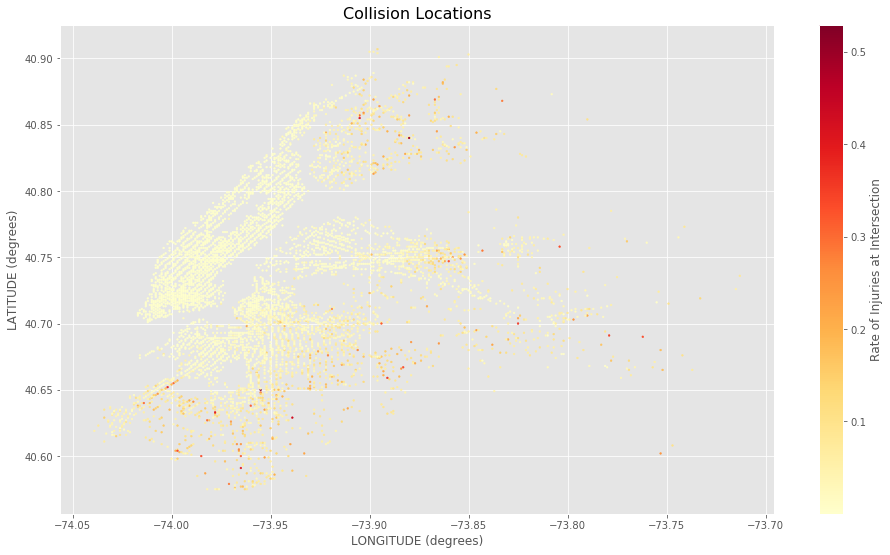

In [369]:
# x = np.array(data['longitude'])
# y = np.array(data['latitude'])
plt.figure(figsize=(16,9))
plt.scatter(data['longitude'],data['latitude'], c=data['rate'], s=3, cmap=plt.cm.YlOrRd)
plt.xlabel('LONGITUDE (degrees)', fontsize=12)
plt.ylabel('LATITUDE (degrees)', fontsize=12)
plt.title('Collision Locations', fontsize=16)
plt.colorbar(label='Rate of Injuries at Intersection')
plt.show()

In [330]:
type(x[1])

str

In [310]:
type(x)

numpy.ndarray

In [93]:
y.max()

1

In [159]:
data3 = data2

In [160]:
data3

,taxi counts,injuries
0,416.0,2.0
1,7141.0,4.0
2,641.0,2.0
3,277.0,1.0
4,25.0,1.0
5,61849.0,3.0
6,16.0,1.0
7,17.0,1.0
8,2679.0,1.0
9,102.0,3.0


In [168]:
data3 = data3.drop(data3[data3['taxi counts'] < 20000].index)

In [164]:
data3.sum([data3['injuries']])

TypeError: unhashable type: 'list'

In [171]:
import statsmodels.api as sm
data3['taxi counts'] = 1
model = sm.OLS(data3['injuries'], data3[['taxi counts','injuries',]])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               injuries   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.949e+33
Date:                Thu, 18 May 2017   Prob (F-statistic):               0.00
Time:                        16:57:22   Log-Likelihood:                 33313.
No. Observations:                1017   AIC:                        -6.662e+04
Df Residuals:                    1015   BIC:                        -6.661e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
taxi counts  7.494e-16   6.95e-17     10.778      0.000      6.13e-16  8.86e-16
injuries        1.0000   1.59e-17   6.28e+16      0.000         1.000     1.000
==============================================================================
Omnibus:                      397.818   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1384.010
Skew:                           1.925   Prob(JB):                    2.92e-301
Kurtosis:                       7.224   Cond. No.                         6.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
data3['injuries'].sum()

0

compute probability of taxi hail p(x)
compute prob of injury p(y)

limit time, limit location

Filter out taxi trips based on time
Remove bike filter